# Visualizations
- Brigitte Hogan (bwh5v@virginia.edu) & Jason Tiezzi (jbt5am@virginia.edu)  
- DS 5001: Exploratory Text Analytics
- April 2020  

## Overview
This notebook creates visualizations for our text analytics project, including those focused on TFIDF, sentiment, word embeddings, LDA, and PCA

## Step Up

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set()
import math
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px
import re


In [4]:
file_dir = 'C:/Users/Jason/Documents/Data Science/Spring 2020/Text Analytics/final_project/DS5001-Text-Analytics/'
data_dir = 'Tables/'
os.chdir(file_dir)

### Loading a few files that will likely be used and reused

In [15]:
LIB = pd.read_csv(data_dir + 'LIB.csv')
LIB.head()

,book_id,author_last,author_full,book_year,book_title,book_file,period
0,9935,WIDAS,Woman's Institute of Domestic Arts and Sciences,1923,"Woman's Institute Library of Cookery, Vol. 1",Cookbooks/WIDAS1923_WILCV01_pg9935.txt,1900s
1,9936,WIDAS,Woman's Institute of Domestic Arts and Sciences,1923,"Woman's Institute Library of Cookery, Vol. 2",Cookbooks/WIDAS1923_WILCV02_pg9936.txt,1900s
2,9937,WIDAS,Woman's Institute of Domestic Arts and Sciences,1923,"Woman's Institute Library of Cookery, Vol. 3",Cookbooks/WIDAS1923_WILCV03_pg9937.txt,1900s
3,9938,WIDAS,Woman's Institute of Domestic Arts and Sciences,1923,"Woman's Institute Library of Cookery, Vol. 4",Cookbooks/WIDAS1923_WILCV04_pg9938.txt,1900s
4,9939,WIDAS,Woman's Institute of Domestic Arts and Sciences,1923,"Woman's Institute Library of Cookery, Vol. 5",Cookbooks/WIDAS1923_WILCV05_pg9939.txt,1900s


In [6]:
TOKEN = pd.read_csv(data_dir + 'TOKEN.csv')
TOKEN.head()

,book_id,vol_num,chap_num,recp_num,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str
0,9935,1,1,1.0,0,0,0,"('1', 'CD')",CD,1,1
1,9935,1,1,1.0,0,0,1,"('.', '.')",.,.,NaN
2,9935,1,1,1.0,0,1,0,"('Without', 'IN')",IN,Without,without
3,9935,1,1,1.0,0,1,1,"('doubt', 'NN')",NN,doubt,doubt
4,9935,1,1,1.0,0,1,2,"(',', ',')",",",",",NaN


In [7]:
VOCAB = pd.read_csv(data_dir + 'VOCAB.csv')
VOCAB.head()

,term_id,term_str,n,num,has_int,stop,stem_porter,stem_snowball,TFIDF_sum_book,TFIDF_sum_recipe,TFIDF_sum_period
0,15108,the,60407,0,0,1,the,the,0.0,14.919713,0.0
1,10502,of,35149,0,0,1,of,of,0.0,13.203503,0.0
2,1546,and,33319,0,0,1,and,and,0.0,7.244055,0.0
3,1062,a,28726,0,0,1,a,a,0.0,12.451291,0.0
4,8071,in,22204,0,0,1,in,in,0.0,9.951277,0.0


## TFIDF

In [93]:
VOCAB_TFIDF = VOCAB[VOCAB.stop==0]
px.scatter(VOCAB_TFIDF, 'n', 'TFIDF_sum_recipe', text='term_str', height=1000, width=1000).update_traces(mode='text')

## Sentiment Analysis

### By Book

In [20]:
## loading the nooks files with the sentiment results and merging with the LIB table
sentiment_book = pd.read_csv(data_dir + 'sentiment_book.csv')
sentiment_book = pd.merge(sentiment_book, LIB, on=['period','book_year','book_id']).set_index(['period','book_year','book_id'])
sentiment_book.head()

nrc_anger  nrc_anticipation  nrc_disgust  nrc_fear  \
period book_year book_id                                                       
1900s  1923      9935      0.009299          0.024444     0.012312  0.011359   
                 9936      0.012711          0.027397     0.016529  0.015915   
                 9937      0.014478          0.020032     0.018361  0.016231   
                 9938      0.008870          0.025764     0.011702  0.010807   
                 9939      0.011967          0.027539     0.011523  0.014888   

                           nrc_joy  nrc_negative  nrc_positive  nrc_sadness  \
period book_year book_id                                                      
1900s  1923      9935     0.035494      0.026247      0.055586     0.015017   
                 9936     0.041149      0.038586      0.061337     0.022778   
                 9937     0.031599      0.040847      0.049636     0.027959   
                 9938     0.033491      0.030584      0.048497     0.014957   
                 9939     0.039244      0.029514      0.056831     0.016439   

                          nrc_surprise  nrc_trust  overall_NRC_valence  \
period book_year book_id                                                 
1900s  1923      9935         0.010355   0.048064             0.029338   
                 9936         0.013325   0.051937             0.022751   
                 9937         0.010111   0.048881             0.008789   
                 9938         0.011876   0.039528             0.017913   
                 9939         0.012410   0.048672             0.027318   

                          VADER_pos  VADER_neg  VADER_neu  VADER_compound  \
period book_year book_id                                                    
1900s  1923      9935      0.052218   0.019987   0.913182        0.097710   
                 9936      0.057870   0.018610   0.908287        0.110839   
                 9937      0.053355   0.023334   0.909780        0.082650   
                 9938      0.055004   0.022308   0.908381        0.081176   
                 9939      0.067045   0.031892   0.879383        0.097248   

                         author_last  \
period book_year book_id               
1900s  1923      9935          WIDAS   
                 9936          WIDAS   
                 9937          WIDAS   
                 9938          WIDAS   
                 9939          WIDAS   

                                                              author_full  \
period book_year book_id                                                    
1900s  1923      9935     Woman's Institute of Domestic Arts and Sciences   
                 9936     Woman's Institute of Domestic Arts and Sciences   
                 9937     Woman's Institute of Domestic Arts and Sciences   
                 9938     Woman's Institute of Domestic Arts and Sciences   
                 9939     Woman's Institute of Domestic Arts and Sciences   

                                                            book_title  \
period book_year book_id                                                 
1900s  1923      9935     Woman's Institute Library of Cookery, Vol. 1   
                 9936     Woman's Institute Library of Cookery, Vol. 2   
                 9937     Woman's Institute Library of Cookery, Vol. 3   
                 9938     Woman's Institute Library of Cookery, Vol. 4   
                 9939     Woman's Institute Library of Cookery, Vol. 5   

                                                       book_file  
period book_year book_id                                          
1900s  1923      9935     Cookbooks/WIDAS1923_WILCV01_pg9935.txt  
                 9936     Cookbooks/WIDAS1923_WILCV02_pg9936.txt  
                 9937     Cookbooks/WIDAS1923_WILCV03_pg9937.txt  
                 9938     Cookbooks/WIDAS1923_WILCV04_pg9938.txt  
                 9939     Cookbooks/WIDAS1923_WILCV05_pg9939.txt

#### VADER

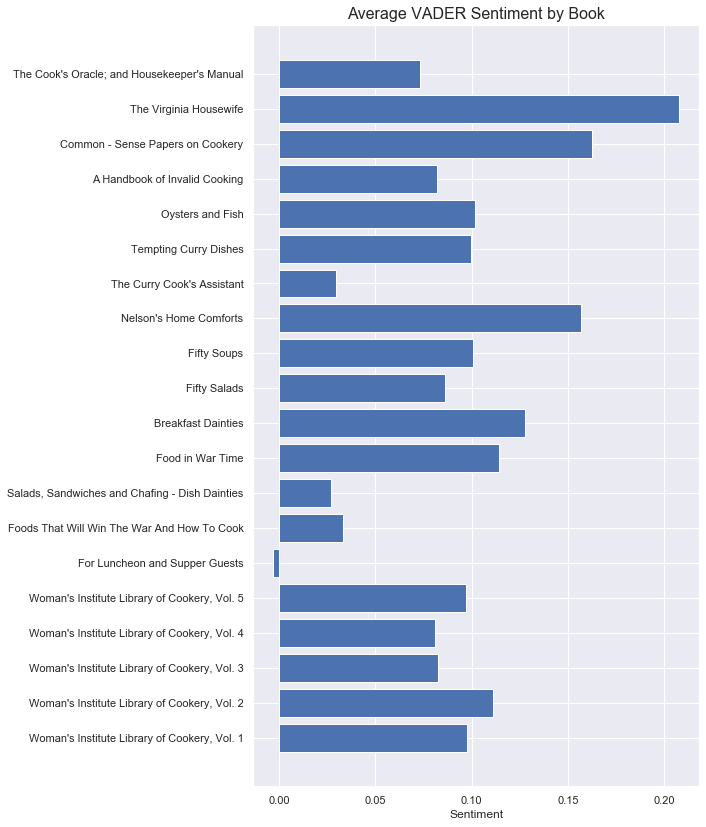

In [48]:
plt.figure(figsize=(8,14))
plt.barh(y=sentiment_book.book_title, width = sentiment_book.VADER_compound, label="VADER", height=.8)
plt.xlabel("Sentiment", fontsize=12)
plt.title("Average VADER Sentiment by Book", fontsize = 16)
plt.show()

#### EmoLex

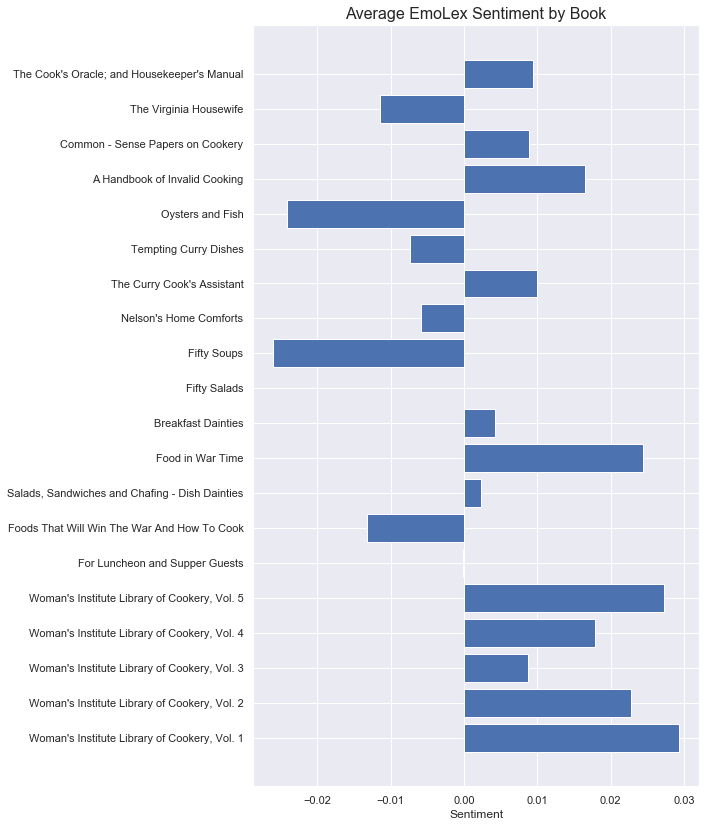

In [54]:
plt.figure(figsize=(8,14))
plt.barh(y=sentiment_book.book_title, width = sentiment_book.overall_NRC_valence, label="NRC", height=.8)
plt.xlabel("Sentiment", fontsize=12)
plt.title("Average EmoLex Sentiment by Book", fontsize = 16)
plt.show()

### Sentiment by Period

In [57]:
sentiment_period = pd.read_csv(data_dir + 'sentiment_period.csv').set_index('period')
sentiment_period


,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust,overall_NRC_valence,VADER_pos,VADER_neg,VADER_neu,VADER_compound
period,,,,,,,,,,,,,,,
1900s,0.012005,0.024323,0.014569,0.013058,0.034571,0.033926,0.051091,0.018929,0.011475,0.044281,0.017165,0.055684,0.025045,0.904859,0.081174
late1800s,0.017366,0.026635,0.017846,0.016050,0.032417,0.041533,0.046556,0.020689,0.014437,0.039717,0.005023,0.067625,0.038279,0.887327,0.104063
mid1800s,0.017872,0.027646,0.019028,0.011857,0.034673,0.042558,0.047484,0.017814,0.016455,0.042500,0.004926,0.058593,0.091800,0.839795,0.091245


#### VADER

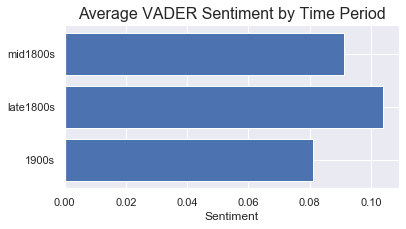

In [61]:
plt.figure(figsize=(6,3))
plt.barh(y=sentiment_period.index, width = sentiment_period.VADER_compound)
plt.xlabel("Sentiment", fontsize=12)
#plt.xlim(0,.05)
plt.title("Average VADER Sentiment by Time Period", fontsize=16)
plt.show()


#### NRC

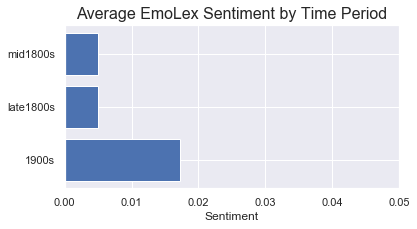

In [63]:
plt.figure(figsize=(6,3))
plt.barh(y=sentiment_period.index, width = sentiment_period.overall_NRC_valence)
plt.xlabel("Sentiment", fontsize=12)
plt.xlim(0,.05)
plt.title("Average EmoLex Sentiment by Time Period", fontsize=16)
plt.show()


## Word Embeddings / TSNE

### For the Mid-1800s

In [67]:
coords = pd.read_csv(data_dir + 'embeddings_mid1800s.csv')
coords.head()

,term_str,vector,x,y
0,take,[-1.53050929e-01 3.09719108e-02 1.91595420e-...,85.659280,-17.071405
1,four,[ 0.17422687 0.0039069 0.59622085 0.571984...,68.650350,-28.981833
2,large,[ 0.219469 -0.0074687 0.46601152 0.430224...,67.774994,-26.723822
3,bunches,[ 0.02387923 0.02593808 0.05778518 0.067628...,2.926333,3.396323
4,of,[ 0.46549538 -0.10890868 0.5857048 0.450142...,64.564140,-29.905810


In [68]:
# merging in the VOCAB table
coords = pd.merge(coords,VOCAB, on='term_str')
coords.head()

,term_str,vector,x,y,term_id,n,num,has_int,stop,stem_porter,stem_snowball,TFIDF_sum_book,TFIDF_sum_recipe,TFIDF_sum_period
0,take,[-1.53050929e-01 3.09719108e-02 1.91595420e-...,85.659280,-17.071405,14903,1336,0,0,0,take,take,0.000000,5.208822,0.0
1,four,[ 0.17422687 0.0039069 0.59622085 0.571984...,68.650350,-28.981833,6710,665,0,0,0,four,four,0.000362,4.251444,0.0
2,large,[ 0.219469 -0.0074687 0.46601152 0.430224...,67.774994,-26.723822,8886,1261,0,0,0,larg,larg,0.000661,5.919678,0.0
3,bunches,[ 0.02387923 0.02593808 0.05778518 0.067628...,2.926333,3.396323,2757,18,0,0,0,bunch,bunch,0.000208,0.444265,0.0
4,of,[ 0.46549538 -0.10890868 0.5857048 0.450142...,64.564140,-29.905810,10502,35149,0,0,1,of,of,0.000000,13.203503,0.0


In [75]:
coords = coords[coords.n >=100] #paring down the vocabulary to only words with a usage of over 100
coords = coords[(coords.stop ==0) & (coords.has_int == 0)] #removing stop words and integers

In [76]:
px.scatter(coords, 'x', 'y', text='term_str', height=1000, width=1000).update_traces(mode='text')

### For the Late-1800s

In [81]:
coords2 = pd.read_csv(data_dir + 'embeddings_late1800s.csv')
coords2.head()

,term_str,vector,x,y
0,dinner,[ 0.0274001 -0.04999767 0.31907833 0.144215...,79.313810,5.548133
1,may,[-8.46489370e-02 -1.12782061e-01 3.90433580e-...,92.270900,13.366926
2,be,[ 0.4524634 0.22340731 0.41153395 -0.002747...,94.847620,7.620177
3,pleasant,[-5.07532572e-03 -3.09885014e-03 7.37485439e-...,-8.701192,20.881012
4,tea,[-0.0209117 -0.11465245 0.2684287 0.066076...,56.921390,-22.468506


In [82]:
coords2 = pd.merge(coords2,VOCAB, on='term_str')
coords2.head()

,term_str,vector,x,y,term_id,n,num,has_int,stop,stem_porter,stem_snowball,TFIDF_sum_book,TFIDF_sum_recipe,TFIDF_sum_period
0,dinner,[ 0.0274001 -0.04999767 0.31907833 0.144215...,79.313810,5.548133,4967,382,0,0,0,dinner,dinner,0.000432,2.780056,0.0
1,may,[-8.46489370e-02 -1.12782061e-01 3.90433580e-...,92.270900,13.366926,9575,4059,0,0,0,may,may,0.001478,11.286535,0.0
2,be,[ 0.4524634 0.22340731 0.41153395 -0.002747...,94.847620,7.620177,2143,13014,0,0,1,be,be,0.000000,16.731512,0.0
3,pleasant,[-5.07532572e-03 -3.09885014e-03 7.37485439e-...,-8.701192,20.881012,11477,44,0,0,0,pleasant,pleasant,0.000224,0.518346,0.0
4,tea,[-0.0209117 -0.11465245 0.2684287 0.066076...,56.921390,-22.468506,14985,593,0,0,0,tea,tea,0.000788,5.685245,0.0


In [83]:
coords2 = coords2[coords2.n >=100] #paring down the vocabulary to only words with a usage of over 100
coords2 = coords2[(coords2.stop ==0) & (coords2.has_int == 0)] #removing stop words and integers


In [84]:
px.scatter(coords2, 'x', 'y', text='term_str', height=1000, width=1000).update_traces(mode='text')

### For the early 1900s

In [88]:
coords3 = pd.read_csv(data_dir + 'embeddings_1900s.csv')
coords3.head()

,term_str,vector,x,y
0,1,[ 1.2470952 -0.7676791 -0.59011555 1.041383...,66.526120,21.515066
1,without,[-1.04925141e-01 1.13204509e-01 7.49024898e-...,-13.947414,61.886940
2,doubt,[ 0.00522298 -0.09532253 -0.05890551 0.043164...,-36.768883,25.725150
3,the,[ 0.21579608 -0.20721246 -0.4829795 -0.735302...,26.274345,35.388070
4,greatest,[ 5.31246923e-02 -2.67657101e-01 -3.05451035e-...,-29.406216,47.776814


In [89]:
coords3 = pd.merge(coords3,VOCAB, on='term_str')
coords3.head()

,term_str,vector,x,y,term_id,n,num,has_int,stop,stem_porter,stem_snowball,TFIDF_sum_book,TFIDF_sum_recipe,TFIDF_sum_period
0,1,[ 1.2470952 -0.7676791 -0.59011555 1.041383...,66.526120,21.515066,14,4035,1,1,0,1,1,0.009640,25.807714,0.0
1,without,[-1.04925141e-01 1.13204509e-01 7.49024898e-...,-13.947414,61.886940,16577,751,0,0,0,without,without,0.000302,3.990442,0.0
2,doubt,[ 0.00522298 -0.09532253 -0.05890551 0.043164...,-36.768883,25.725150,5252,63,0,0,0,doubt,doubt,0.000224,0.504124,0.0
3,the,[ 0.21579608 -0.20721246 -0.4829795 -0.735302...,26.274345,35.388070,15108,60407,0,0,1,the,the,0.000000,14.919713,0.0
4,greatest,[ 5.31246923e-02 -2.67657101e-01 -3.05451035e-...,-29.406216,47.776814,7253,93,0,0,0,greatest,greatest,0.000371,0.605662,0.0


In [90]:
coords3 = coords3[coords3.n >=100] #paring down the vocabulary to only words with a usage of over 100
coords3 = coords3[(coords3.stop ==0) & (coords3.has_int == 0)] #removing stop words and integers


In [91]:
px.scatter(coords3, 'x', 'y', text='term_str', height=1000, width=1000).update_traces(mode='text')